In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def mae_loss(e):
    return np.mean(np.abs(e))
    
    
def mse_loss(e):
    return 0.5 * np.dot(e,e) /e.shape[0]
    
    
def compute_loss(y, tx, w, mse=True):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx.dot(w)
    if mse:
        return mse_loss(e)
    
    return mae_loss(e)

In [5]:
%timeit compute_loss(y, tx, np.array([1, 2]))

157 µs ± 28.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
compute_loss(y, tx, np.array([1, 2]))

2694.483365887085

# 2 Grid Search

Fill in the function `grid_search()` below:

In [7]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i, ele0 in enumerate(w0):
        for j, ele1 in enumerate(w1):
            losses[i, j] = compute_loss(
                y, 
                tx, 
                np.array((ele0, ele1), dtype=np.float)
            )
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=17361.49544708975, w0*=200.0, w1*=150.0, execution time=0.002 seconds


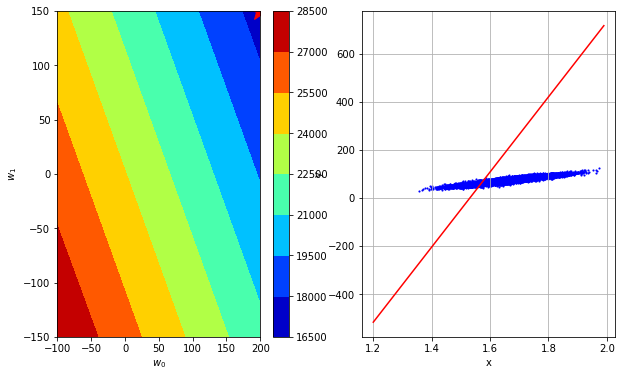

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=2)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
#fig.savefig("grid_plot")  # Optional saving

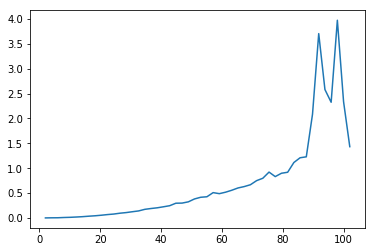

In [9]:
# computational cost is quadratic
intervals = np.linspace(2, 102, 50)
execution_times = []

for inter in intervals:
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=inter)

    # Start the grid search
    start_time = datetime.datetime.now()
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)

    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    end_time = datetime.datetime.now()
    execution_time = (end_time - start_time).total_seconds()
    execution_times.append(execution_time)
    # Print the results
#     print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
#           l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

    # Plot the results
#     fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
#     fig.set_size_inches(10.0,6.0)
    #fig.savefig("grid_plot")  # Optional saving
    
plt.plot(intervals, execution_times)
plt.show()

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [10]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = y - tx.dot(w)
    return - tx.T.dot(e) / y.shape[0]

In [11]:
compute_gradient(y, tx, np.array([100, 20]))

array([26.706078  ,  6.52028757])

In [12]:
compute_loss(y, tx, np.array([100, 20]))

393.2502638488683

In [13]:
compute_gradient(y, tx, np.array([50, 10]))

array([-23.293922  ,  -3.47971243])

Please fill in the functions `gradient_descent` below:

In [14]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        w = w - gamma*compute_gradient(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l:.10}, w0={w0:.10}, w1={w1:.10}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [15]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 1

# Initialization
w_initial = np.array([-100, -150])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=28393.58578, w0=73.293922, w1=13.47971243
Gradient Descent(1/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(2/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(3/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(4/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(5/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(6/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(7/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(8/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(9/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(10/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(11/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(12/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gradient Descent(13/49): loss=15.38588787, w0=73.293922, w1=13.47971243
Gr

In [16]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [41]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters): 
        [(minibatch_y, minibatch_tx)] = list(batch_iter(y, tx, batch_size))
        
        loss = compute_loss(minibatch_y, minibatch_tx, w)
        w = w - gamma*compute_gradient(minibatch_y, minibatch_tx, w)

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [48]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/49): loss=3535.2525614152337, w0=58.86040698285163, w1=73.40848685358529
SGD(1/49): loss=47.755897400435366, w0=52.01929746374388, w1=71.44113152949062
SGD(2/49): loss=465.78670069735534, w0=73.3844786397463, w1=72.80341453186728
SGD(3/49): loss=1436.8066110530096, w0=35.86021343931967, w1=39.31592330996526
SGD(4/49): loss=4095.8790317665967, w0=99.21604546077816, w1=-71.1132447970437
SGD(5/49): loss=13255.479876777195, w0=-14.759260106882635, w1=124.69836670417152
SGD(6/49): loss=21535.72916160696, w0=-160.03491043540402, w1=-256.3511039297724
SGD(7/49): loss=21314.23467663478, w0=-15.508269351131673, w1=-267.7160720401969
SGD(8/49): loss=12209.428606166717, w0=93.8774702772284, w1=-242.01271228064294
SGD(9/49): loss=12755.80002041279, w0=-17.928987586369686, w1=-185.2627085063521
SGD(10/49): loss=39447.18273533688, w0=-214.5459733241999, w1=183.83466673087474
SGD(11/49): loss=68058.69505292762, w0=43.712658964963, w1=75.1392584663644
SGD(12/49): loss=1981.1643186644662, w0=-0.3

In [49]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

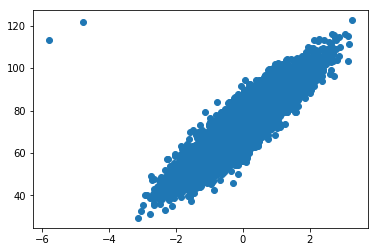

In [40]:
height, weight, gender = load_data(sub_sample=False, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(tx[:, 1], y)

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)